<a href="https://colab.research.google.com/github/Nandhinisaravanann/OutriX_tasks/blob/main/Outrix_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### **Import Libraries**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### **Import Raw Data**

In [6]:
df = pd.read_csv("/content/drive/MyDrive/OUTRIX/data.csv", encoding="latin1")

In [7]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


##### **DATA CLEANING**

In [8]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert InvoiceDate to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Remove missing CustomerID rows
df = df.dropna(subset=["CustomerID"])

# Remove negative/zero values for Quantity & UnitPrice
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

# Reset index
df.reset_index(drop=True, inplace=True)

# Create a new column for Total Sales
df["TotalSales"] = df["Quantity"] * df["UnitPrice"]

print("Data cleaned. Shape:", df.shape)

Data cleaned. Shape: (392692, 9)


##### **Sample Data**

In [9]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


In [10]:
df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
392682,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00
392683,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00
392684,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France,15.60
392685,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,23.40
392686,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
392687,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
392688,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
392689,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
392690,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
392691,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [11]:
#Field Info
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalSales'],
      dtype='object')

In [12]:
#Data Types
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
TotalSales,float64


##### **EDA(EXPLORATORY DATA ANALYSIS)**

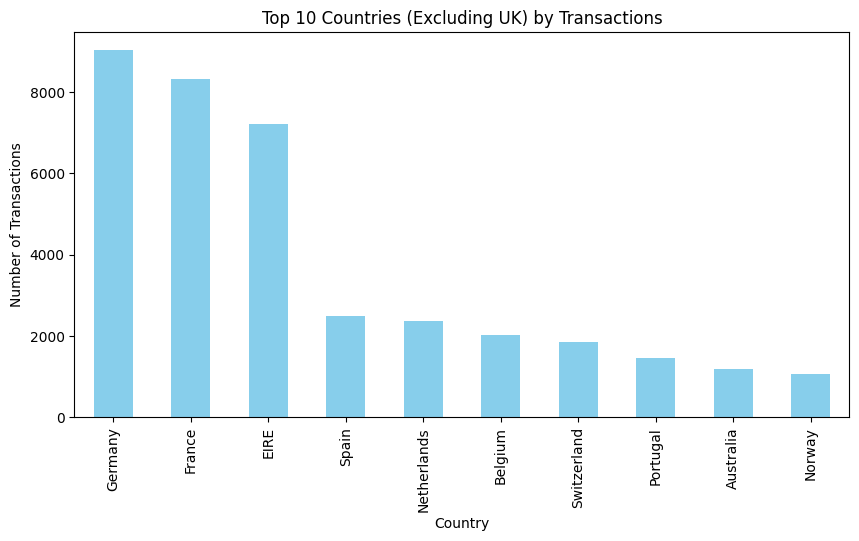

In [13]:
# Top 10 countries by transactions (excluding UK for variety)
plt.figure(figsize=(10,5))
df[df["Country"]!="United Kingdom"]["Country"].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Countries (Excluding UK) by Transactions")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=90)
plt.show()

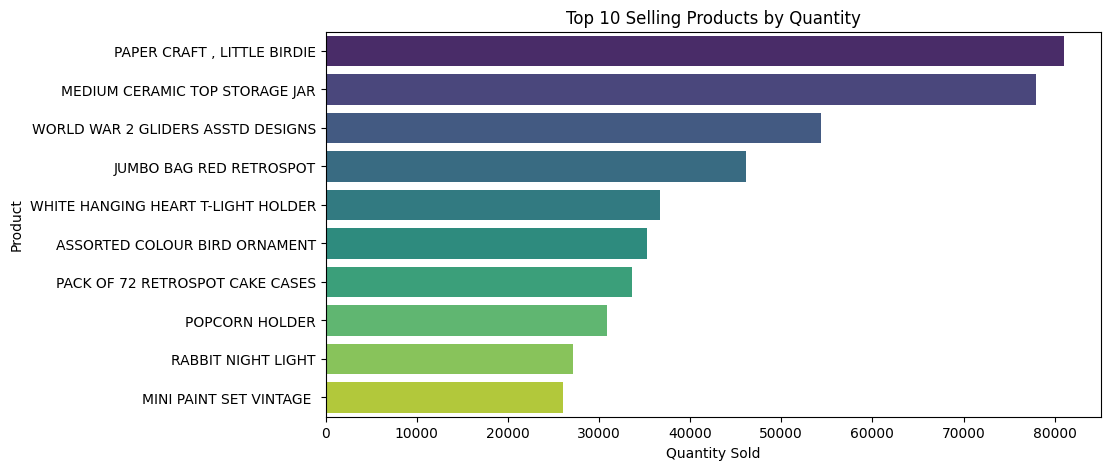

In [14]:
# Top 10 selling products
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette="viridis", legend=False)
plt.title("Top 10 Selling Products by Quantity")
plt.xlabel("Quantity Sold")
plt.ylabel("Product")
plt.show()

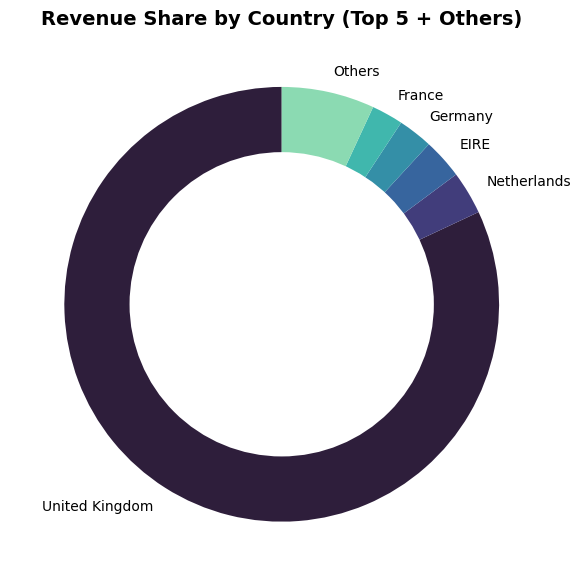

In [15]:
# Revenue by Country
revenue_by_country = df.groupby("Country")["TotalSales"].sum().sort_values(ascending=False)

# Take top 5 countries, group the rest as "Others"
top_n = 5
top_countries = revenue_by_country.head(top_n)
others = pd.Series(revenue_by_country[top_n:].sum(), index=["Others"])
revenue_final = pd.concat([top_countries, others])

# Colors
colors = sns.color_palette("mako", len(revenue_final))

# Donut chart
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(revenue_final.values,labels=revenue_final.index,
                                   autopct='%1.1f%%',startangle=90,colors=colors,
                                   textprops={'fontsize': 10})

# Donut hole
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Styling
plt.title("Revenue Share by Country (Top 5 + Others)", fontsize=14, weight='bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(9)

plt.tight_layout()
plt.show()

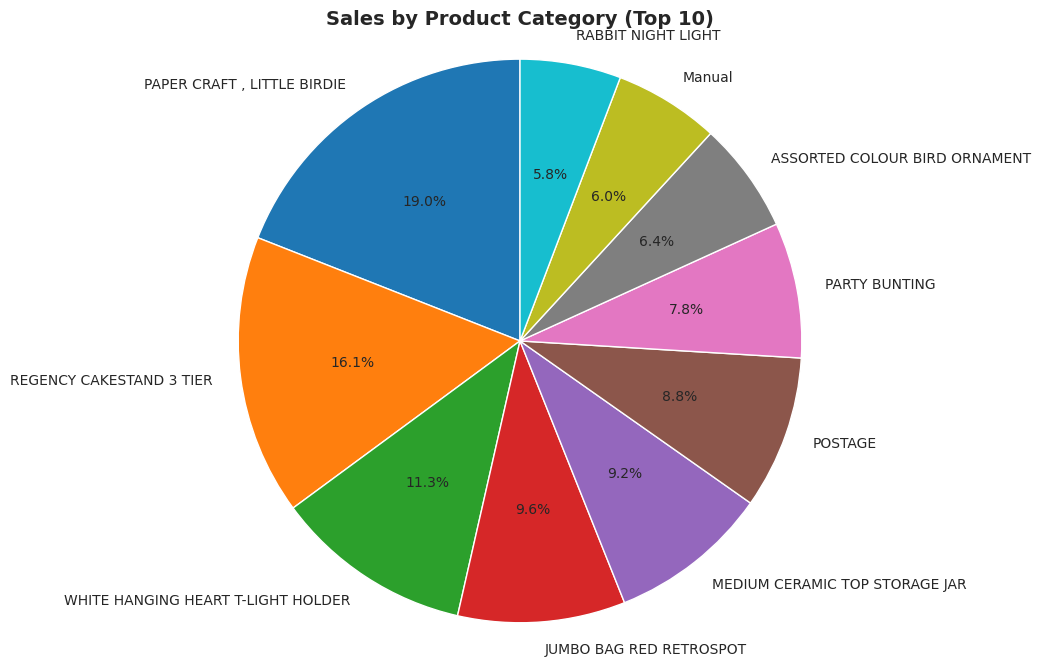

In [19]:
# Sales by Product Category (Top 10 for clarity)
sales_by_product = df.groupby("Description")["TotalSales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,8))
plt.pie(
    sales_by_product,
    labels=sales_by_product.index,
    autopct="%.1f%%",
    startangle=90
)
plt.title("Sales by Product Category (Top 10)", fontsize=14, weight="bold")
plt.axis("equal")  # Makes it a perfect circle
plt.show()


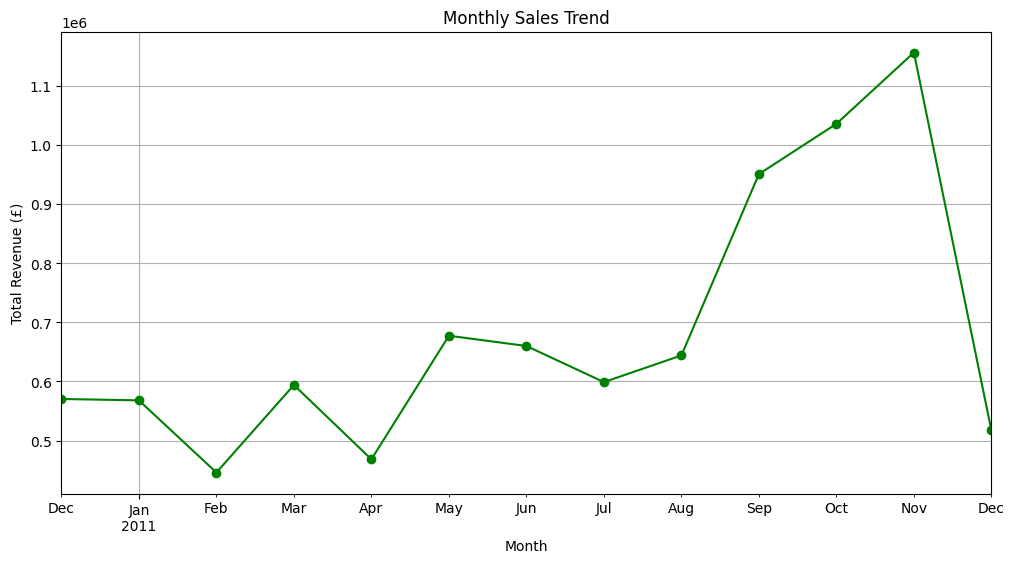

In [16]:
# Monthly sales trend
df["Month"] = df["InvoiceDate"].dt.to_period("M")
monthly_sales = df.groupby("Month")["TotalSales"].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind="line", marker="o", color="green")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue (£)")
plt.grid(True)
plt.show()


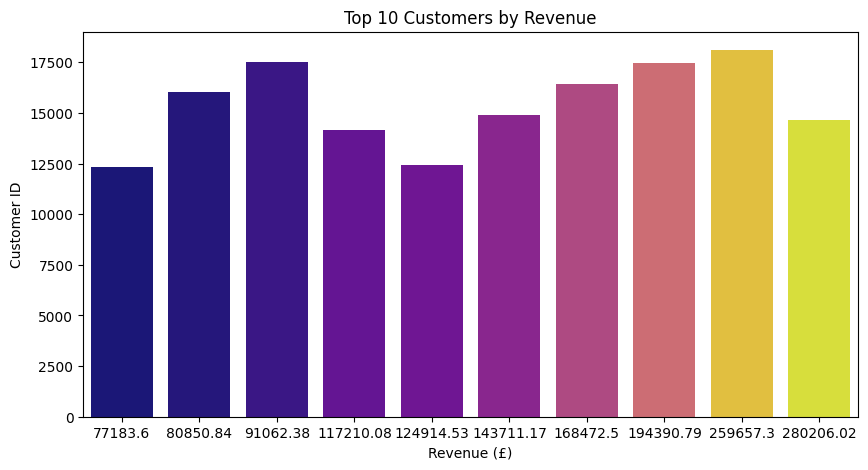

In [17]:
# Top 10 customers by revenue
# Make sure to run the data cleaning cell above before running this cell.
top_customers = df.groupby("CustomerID")["TotalSales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.values, y=top_customers.index, hue=top_customers.values, palette="plasma", legend=False)
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Revenue (£)")
plt.ylabel("Customer ID")
plt.show()

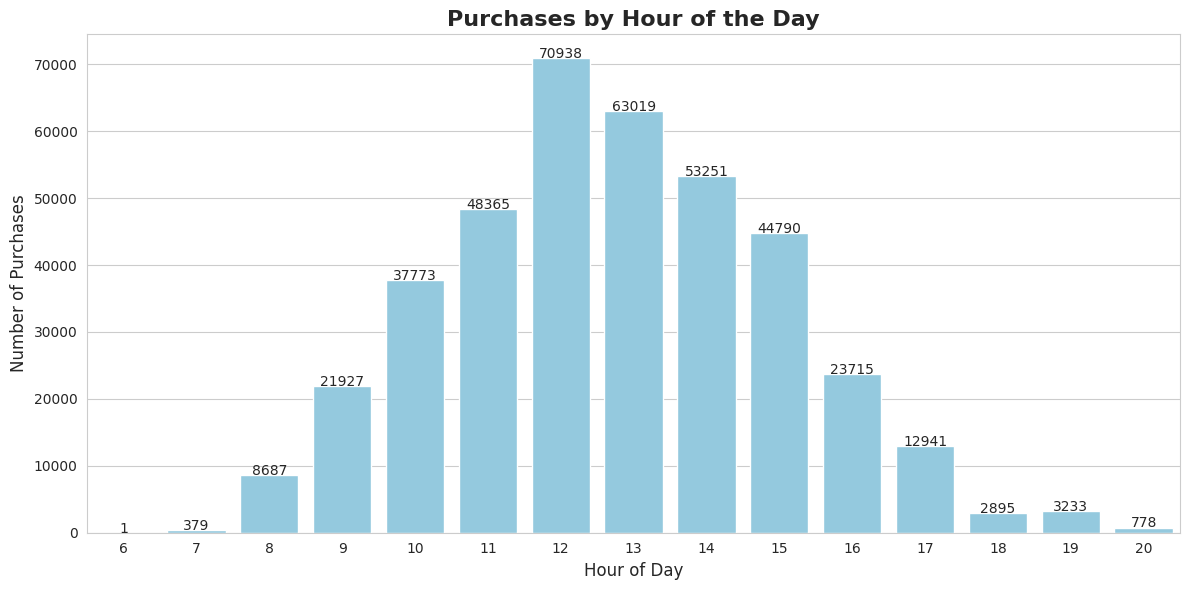

In [18]:
# Hourly purchase behavior
df["Hour"] = df["InvoiceDate"].dt.hour
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.countplot(x="Hour", data=df, color="skyblue")  # Use 'color' instead of palette if no hue
# Titles and labels
plt.title("Purchases by Hour of the Day", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Purchases", fontsize=12)
# Optional: Annotate counts on top of bars
hour_counts = df["Hour"].value_counts().sort_index()
for i, count in enumerate(hour_counts):
    plt.text(i, count + 5, str(count), ha='center')

plt.tight_layout()
plt.show()